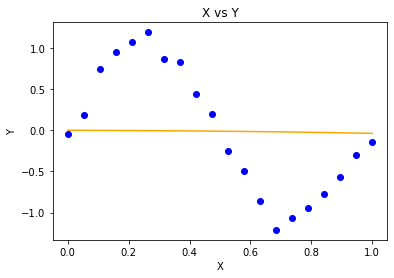

In [36]:
import numpy as np
 
import math
from scipy.interpolate import interpolate

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
     
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        lossTracker=[]
        loss=0
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = (h - self.Y)
            lossTracker.append(sum(error)/10)
            
            
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error )
        #print(self.W)
        #print(lossTracker)
        return self
     
    # predict
     
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n_samples=20
    X = np.sort(np.linspace(0, 1, n_samples))
    N = np.random.normal(0, 1, size=20)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
     
    model = PolynomailRegression( degree = 3, learning_rate = 0.01, iterations = 10 )
 
    model.fit( X_train, Y_train )
     
    # Prediction on training set
 
    Y_pred = model.predict( X )
    #print(X_test)
    #print(Y_pred) 
    # Visualization
     
    plt.scatter( X, Y, color = 'blue' )
    
  
    plt.plot( X, Y_pred, color = 'orange' )
     
    plt.title( 'X vs Y' )
     
    plt.xlabel( 'X' )
     
    plt.ylabel( 'Y' )
     
    plt.show()
 
 
if __name__ == "__main__" :
     
    main()